In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set('paper', 'white', 'Paired', font_scale=2,
rc={'lines.linewidth': 2,
'text.usetex' : False,
'figure.figsize': (10.0, 6.0),
'image.interpolation': 'nearest',
'image.cmap': 'gray'})
sns.set_style(style='whitegrid')
sns.set_palette('colorblind', color_codes=True)
# define valores padrões do tamanho dos plots
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20

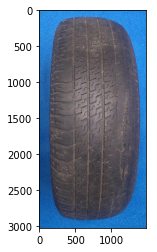

(3029, 1490, 3)


In [2]:
img = cv2.imread('../data/tires_fake/tire-0001.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()
print(img.shape)

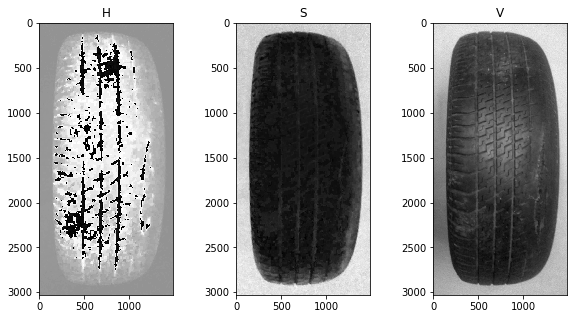

In [3]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))
ax1.set_title("H")
ax1.imshow(h, cmap="gray")
ax2.set_title("S")
ax2.imshow(s, cmap="gray")
ax3.set_title("V")
ax3.imshow(v, cmap="gray")
plt.show()

In [4]:
hsv_flattened = []

for channel in range(3):
    flattened = np.array(img_hsv[:, :, channel]).flatten()
    flattened_series = pd.Series(flattened)
    print(flattened_series.describe())
    hsv_flattened.append(flattened_series)

count    4.513210e+06
mean     1.212875e+02
std      4.677303e+01
min      0.000000e+00
25%      1.040000e+02
50%      1.230000e+02
75%      1.600000e+02
max      1.790000e+02
dtype: float64
count    4.513210e+06
mean     8.424648e+01
std      8.414961e+01
min      0.000000e+00
25%      2.100000e+01
50%      3.300000e+01
75%      2.000000e+02
max      2.520000e+02
dtype: float64
count    4.513210e+06
mean     1.253441e+02
std      5.105006e+01
min      4.700000e+01
25%      8.800000e+01
50%      1.050000e+02
75%      1.550000e+02
max      2.540000e+02
dtype: float64


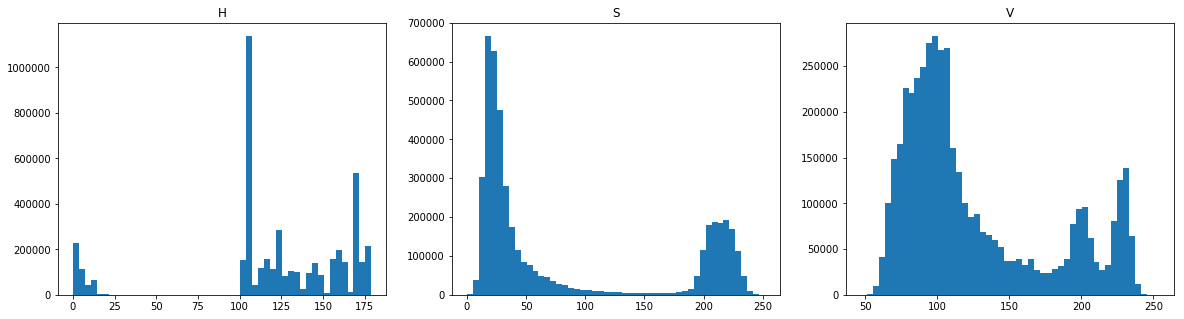

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.set_title("H")
ax1.hist(hsv_flattened[0], bins=50)
ax2.set_title("S")
ax2.hist(hsv_flattened[1], bins=50)
ax3.set_title("V")
ax3.hist(hsv_flattened[2], bins=50)
plt.show()

In [88]:
def filt(x, mu=120, sigma=12.7, alpha=1):
    num = x-mu
    den = np.sqrt(2)*sigma
    exp = 2*alpha
    
    return (1-np.exp(-(num/den)**exp))

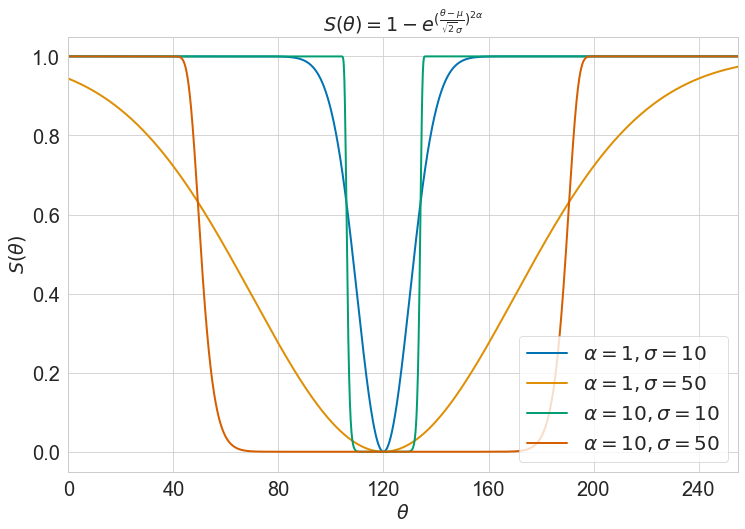

In [107]:
from itertools import product

step = 0.1
x = np.arange(0, 255+step, step)

mu = 120
alpha = [1, 10]
sigma = [10, 50]


plt.figure(figsize=(12, 8))

for a, s in product(alpha, sigma):
    y = filt(x, mu=mu, alpha=a, sigma=s)
    plt.plot(x, y)



plt.xticks(np.arange(0, 255, 40))

plt.legend([f'$\\alpha={a}, \\sigma={s}$' for a, s in product(alpha, sigma)], loc='lower right')
plt.xlim([0, 255])
# plt.ylim([0, 1.05])
plt.xlabel('$\\theta$')
plt.ylabel('$S(\\theta)$')
plt.title('$S(\\theta) = 1 - e^{(\\frac{\\theta-\\mu}{\\sqrt{2}\\sigma})^{2\\alpha}}$')

plt.show()